## install libraies

In [1]:
pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 48kB/s 
     |████████████████████████████████| 460kB 20.5MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
pip install keras==2.4.3

## load libraies

In [3]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [4]:
keras.__version__

'2.4.3'

In [5]:
tensorflow.__version__

'2.3.0'

## load dataset

In [6]:
train_data_path = "/content/drive/MyDrive/disease detaction project/dataset/train"
validation_data_path = "/content/drive/MyDrive/disease detaction project/dataset/val"

## image show function

In [7]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## multiple image generate

In [8]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")


training_data = training_datagen.flow_from_directory(train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 1951 images belonging to 4 classes.


In [9]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [10]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "binary")

Found 324 images belonging to 4 classes.


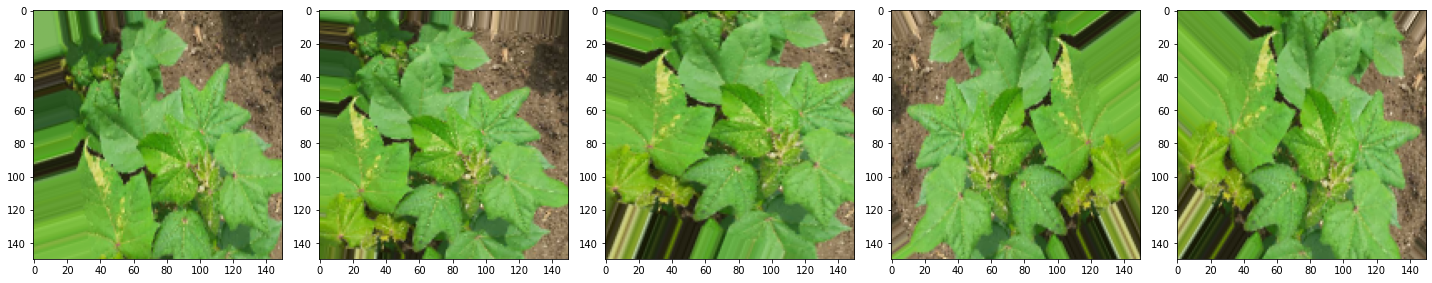

In [11]:
images = [training_data[0][0][0] for i in range(5)]
plotimages(images)

# model save

In [12]:
model_path = "/content/drive/MyDrive/disease detaction project/model/disease_detation_model2.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

## create model

In [13]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation="relu"),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation="relu"),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation="softmax")
    
])

## model compile

In [14]:
cnn_model.compile(optimizer= Adam(lr=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

## train model

In [16]:
history = cnn_model.fit(training_data,
                       epochs=150,
                       verbose=1,
                       validation_data= valid_data,
                       callbacks=callbacks_list)

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.4567 
Epoch 00001: val_accuracy improved from -inf to 0.49691, saving model to /content/drive/MyDrive/disease detaction project/model/disease_detation_model2.h5
61/61 [==============================] - 1218s 20s/step - loss: 1.2372 - accuracy: 0.4567 - val_loss: 1.0978 - val_accuracy: 0.4969
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 1.0574 - accuracy: 0.5448
Epoch 00002: val_accuracy improved from 0.49691 to 0.61111, saving model to /content/drive/MyDrive/disease detaction project/model/disease_detation_model2.h5
61/61 [==============================] - 25s 407ms/step - loss: 1.0574 - accuracy: 0.5448 - val_loss: 0.9228 - val_accuracy: 0.6111
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 0.9282 - accuracy: 0.6315
Epoch 00003: val_accuracy improved from 0.61111 to 0.69444, saving model to /content/drive/MyDrive/disease detaction project/model/diseas

model accuracy and loss visualization

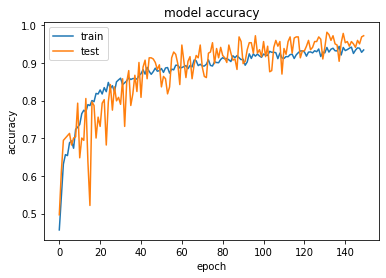

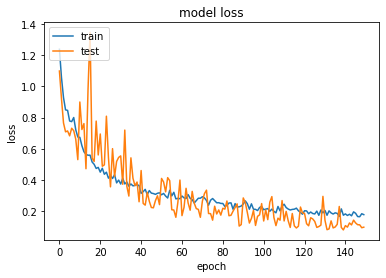

In [17]:
#accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

#loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()